# Forma alternativa de prever a idade dos Abalones - Análise preditiva 🐚

  "A idade do abalone é determinada cortando-se a concha através do cone, colorindo-o e contando o número de anéis através de um microscópio – uma tarefa chata e demorada."
https://archive.ics.uci.edu/dataset/1/abalone

 ✨ Será utilizado um modelo de aprendizado de máquina para prever a quantidade de anéis (e, portanto, a idade) a partir de medições físicas otimizando o trabalho de pesquisadores.



#### importando biblioteca

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# método para particionar dados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, PoissonRegressor

#método de avaliação de modelo (erro)
from sklearn.metrics import mean_absolute_error

#importando técnicas
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
arquivo_data = '/content/drive/MyDrive/abalone.csv'
df = pd.read_csv(arquivo_data)

df.head(5)

,Sexo,Comprimento,Diâmetro,Altura,Peso_total,Peso_sem_concha,Peso_Viceras,Peso_da_concha,Aneis
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Estruturando a tabela

### Dicionário 📚

In [4]:
import pandas as pd

data_dictionary = pd.DataFrame([
    {
        'variavel': 'Sex',
        'descrição': 'M, F e I (infante)',
        'tipo': 'categórico',
        'subtipo': 'nominal',
        'observação': 'M=1 / F=2 / I=3'
    },
    {
        'variavel': 'Length',
        'descrição': 'Medida da maior concha',
        'tipo': 'numérico',
        'subtipo': 'contínuo',
        'observação': 'mm'
    },
    {
        'variavel': 'Diameter',
        'descrição': 'Perpendicular ao comprimento',
        'tipo': 'numérico',
        'subtipo': 'contínuo',
        'observação': 'mm'
    },
    {
        'variavel': 'Height',
        'descrição': 'tamanho do animal',
        'tipo': 'numérico',
        'subtipo': 'contínuo',
        'observação': 'mm'
    },
    {
        'variavel': 'Whole_weight',
        'descrição': 'peso do Abalone inteiro',
        'tipo': 'numérico',
        'subtipo': 'contínuo',
        'observação': 'gramas'
    },
    {
        'variavel': 'Shucked_weight',
        'descrição': 'Peso do abalone sem concha',
        'tipo': 'numérico',
        'subtipo': 'contínuo',
        'observação': 'gramas'
    },
    {
        'variavel': 'Viscera_weight',
        'descrição': 'Peso do intestino (após sangria)',
        'tipo': 'numérico',
        'subtipo': 'contínuo',
        'observação': 'gramas'
    },
    {
        'variavel': 'Shell_weight',
        'descrição': 'peso da concha após secagem',
        'tipo': 'numérico',
        'subtipo': 'contínuo',
        'observação': 'gramas'
    },
    {
        'variavel': 'Rings',
        'descrição': 'Número de anéis que indica a idade em anos (+1.5)',
        'tipo': 'numérico',
        'subtipo': 'discreto',
        'observação': ''
    }
])




In [5]:
data_dictionary

,variavel,descrição,tipo,subtipo,observação
0,Sex,"M, F e I (infante)",categórico,nominal,M=1 / F=2 / I=3
1,Length,Medida da maior concha,numérico,contínuo,mm
2,Diameter,Perpendicular ao comprimento,numérico,contínuo,mm
3,Height,tamanho do animal,numérico,contínuo,mm
4,Whole_weight,peso do Abalone inteiro,numérico,contínuo,gramas
5,Shucked_weight,Peso do abalone sem concha,numérico,contínuo,gramas
6,Viscera_weight,Peso do intestino (após sangria),numérico,contínuo,gramas
7,Shell_weight,peso da concha após secagem,numérico,contínuo,gramas
8,Rings,Número de anéis que indica a idade em anos (+1.5),numérico,discreto,


#### Verificando o número de linhas e colunas

In [6]:
num_linhas, num_colunas = df.shape
print(f"Número de linhas: {num_linhas}")
print(f"Número de colunas: {num_colunas}")

Número de linhas: 4177
Número de colunas: 9


#### Verificando valores nulos ou igual a zero

In [7]:
print("Valores nulos:\n", df.isnull().sum())

print("\nValores iguais a zero:\n", (df == 0.0000).sum())

Valores nulos:
 Sexo               0
Comprimento        0
Diâmetro           0
Altura             0
Peso_total         0
Peso_sem_concha    0
Peso_Viceras       0
Peso_da_concha     0
Aneis              0
dtype: int64

Valores iguais a zero:
 Sexo               0
Comprimento        0
Diâmetro           0
Altura             2
Peso_total         0
Peso_sem_concha    0
Peso_Viceras       0
Peso_da_concha     0
Aneis              0
dtype: int64


#### Excluindo valores zeros na coluna altura

In [8]:
df = df[df['Altura'] != 0.0000]
print("Excluído com sucesso")

Excluído com sucesso


#### Estatística descritiva - dados numéricos

In [9]:
df.describe().round(4)

,Comprimento,Diâmetro,Altura,Peso_total,Peso_sem_concha,Peso_Viceras,Peso_da_concha,Aneis
count,4175.0000,4175.0000,4175.0000,4175.0000,4175.0000,4175.0000,4175.0000,4175.0000
mean,0.5241,0.4079,0.1396,0.8290,0.3595,0.1807,0.2388,9.9351
std,0.1201,0.0992,0.0417,0.4903,0.2220,0.1096,0.1392,3.2242
min,0.0750,0.0550,0.0100,0.0020,0.0010,0.0005,0.0015,1.0000
25%,0.4500,0.3500,0.1150,0.4422,0.1862,0.0935,0.1300,8.0000
50%,0.5450,0.4250,0.1400,0.8000,0.3360,0.1710,0.2340,9.0000
75%,0.6150,0.4800,0.1650,1.1535,0.5020,0.2530,0.3288,11.0000
max,0.8150,0.6500,1.1300,2.8255,1.4880,0.7600,1.0050,29.0000


- A mediana de anéis nos abalones estudados é de 9 o que daria 9 * 1,5 = 13 anos e 5 meses
- A quantide de anéis mínimas observadas foi 1 = 1,5 ano
- A quantidade de anéis máximos observados foi 29 = 43,5 anos


#### Estatística descritiva - dados categóricos

In [10]:
df[['Sexo']].describe()

,Sexo
count,4175
unique,3
top,M
freq,1528


O sexo mais predominante é o masculino com uma frequencia de 1528 dos 4175 dados o que dá 36.6% dos dados nesse estudo.

#### Mudando o tipo da coluna Sexo de categórico para númerico
-------------
Necessário para análises preditivas

In [11]:
df['Sexo'] = df['Sexo'].replace({'M': 1, 'F': 2, 'I': 3})
df['Sexo']

<ipython-input-11-f3262b79968e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sexo'] = df['Sexo'].replace({'M': 1, 'F': 2, 'I': 3})


,Sexo
0,1
1,1
2,2
3,1
4,3
...,...
4172,2
4173,1
4174,1
4175,2


#### Matriz de Correlação

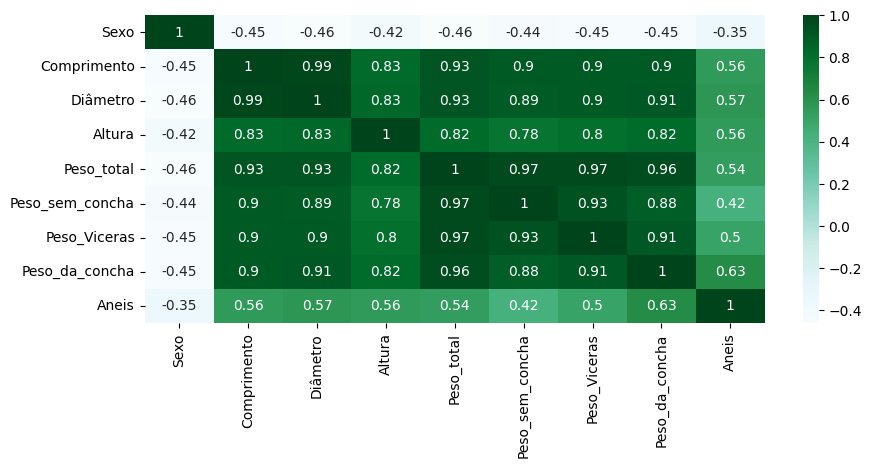

In [12]:
# Calcula a matriz de correlação
corr = df.corr(numeric_only=True)
features = corr.index

# Cria o gráfico de calor
plt.figure(figsize=(10, 4))
ax = sns.heatmap(df[features].corr(), annot=True, cmap='BuGn')
plt.show()

Considerando os **Anéis** como a minha variável resposta, os maiores valores encontrados de correlação são: **Peso_da_Concha: 0.63**, **Diâmetro: 0.57**, **Altura: 0.56** e **comprimento 0.56**.

--------------------
Nesse estudo eu preferi usar Altura em relação a comprimento porque comprimento tem multicolinearidade alta com diversas variáveis.

### Maior correlação encontrada : Comprimento e Diâmetro


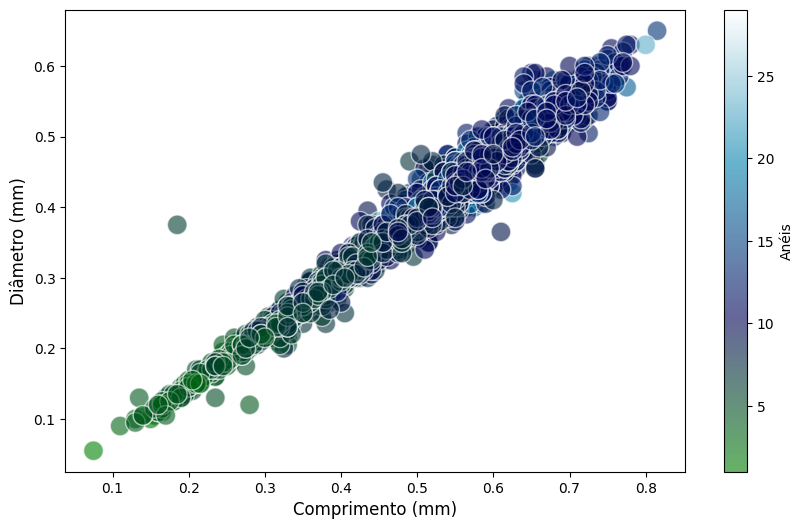

In [13]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Comprimento'], df['Diâmetro'], c=df['Aneis'], cmap='ocean', s=200,  edgecolor='white', alpha=0.6)
plt.colorbar(scatter, label='Anéis')
plt.xlabel('Comprimento (mm)', fontsize=12)
plt.ylabel('Diâmetro (mm)', fontsize=12)
plt.show()

Essa é a maior correlação encontrada 0.99 na tabela o que informa que ambas as variáveis explicam os mesmos grupos de dados não sendo interessante colocar ambas como variáveis Y do meu estudo.

#### Relação entre quantidade de anéis e tamanho

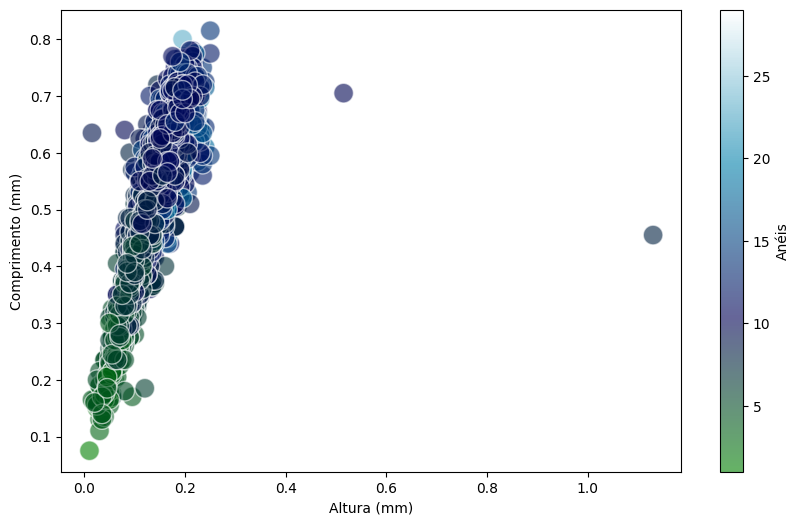

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Criando o gráfico de dispersão
scatter = plt.scatter(df['Altura'], df['Comprimento'], c=df['Aneis'], cmap='ocean', s=200, edgecolor='white', alpha=0.6)

# Adicionando a barra de cores
plt.colorbar(scatter, label='Anéis')

# Definindo o título e os rótulos dos eixos
plt.title('')
plt.xlabel('Altura (mm)')
plt.ylabel('Comprimento (mm)')  # Mantendo o eixo y vazio conforme sua solicitação


# Mostrando o gráfico
plt.show()


Quanto maior em altura e comprimento, mais áneis/ idade os abalones possuem

#### Relação entre quantidade de anéis e peso

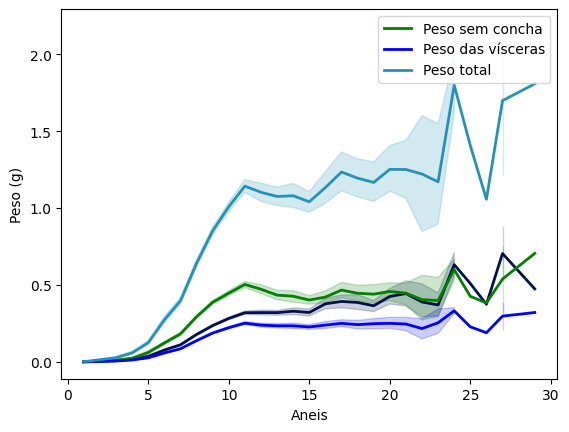

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando a paleta de cores
sns.set_palette('ocean')

# Criando os gráficos de linhas
sns.lineplot(x='Aneis', y='Peso_da_concha', data=df, color=sns.color_palette()[1], linewidth=2)
sns.lineplot(x='Aneis', y='Peso_sem_concha', data=df, color='green', label='Peso sem concha', linewidth=2)
sns.lineplot(x='Aneis', y='Peso_Viceras', data=df, color='blue', label='Peso das vísceras', linewidth=2)
sns.lineplot(x='Aneis', y='Peso_total', data=df, color=sns.color_palette()[4], label='Peso total', linewidth=2)

# Definindo o rótulo do eixo y
plt.ylabel('Peso (g)')

# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.show()


Existe uma relação positiva entre o peso e a quantidade de anéis. Quanto mais pesado o animal, mais anéis/idade ele possui.  

### Distribuição dos abalones quanto aos anéis


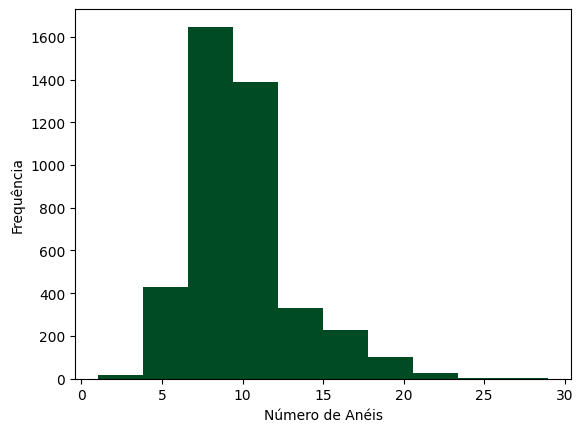

In [16]:
sns.set_palette('ocean')

df['Aneis'].hist(color=sns.color_palette()[0], bins=10, edgecolor='none')  # Removendo bordas

plt.xlabel('Número de Anéis')
plt.ylabel('Frequência')
plt.grid(False)

plt.show()


Dos 4175 dados desse estudo, um pouco mais de 1600 são de abalones com um número de anéis entre 7 e 9. A média desses valores é 8 que múltiplicado pelos anos de via 1,5 ano = 12 anos de idade na maioria dos abalones estudados

#### Porcentagem de animais por sexo

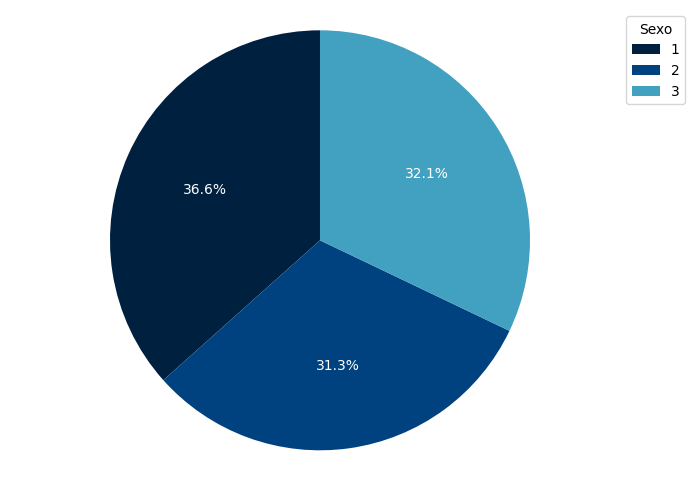

In [17]:
sexo_counts = df['Sexo'].value_counts().sort_index()  # Organiza em ordem alfabética


plt.figure(figsize=(8, 6))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("ocean", n_colors=len(sexo_counts)),
        textprops={'color': 'white'})  # Mudando a cor do texto para branco

# Adicionando a legenda
plt.legend(sexo_counts.index, title="Sexo", loc='upper right', bbox_to_anchor=(1.1, 1))


plt.axis('equal')
plt.show()


Sexo **Masculino (1)** ; **Feminino (2)** ; **Ifante (3)**. Todos estão representados quase que igualmente.

#### Relação entre quantidade de anéis e sexo

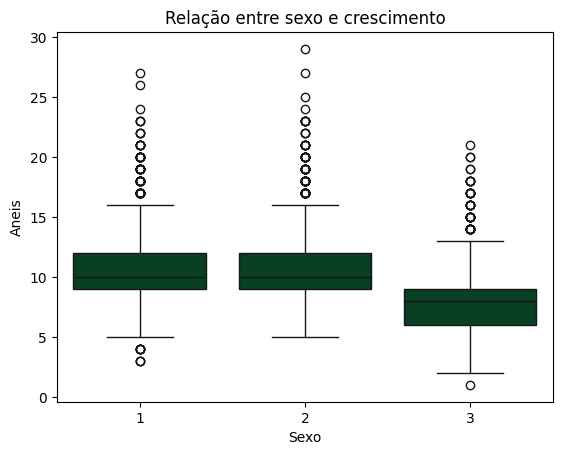

In [18]:
sns.set_palette('ocean')
sns.boxplot(x='Sexo', y='Aneis', data=df, color=sns.color_palette()[0])
plt.title('Relação entre sexo e crescimento')

plt.show()

Não é possível afirmar que a quantidade de anéis é maior ou menor nos sexos femininos e masculinos pois estão nos mesmos intervalos quartilicos e há uma grande quantidade de outliers. Os infantes estão os os intervalos menores provavelmente influenciados por variaveis como tamanho.

#### Olhando o comportamento de todas as variáveis usando o **pairplot**

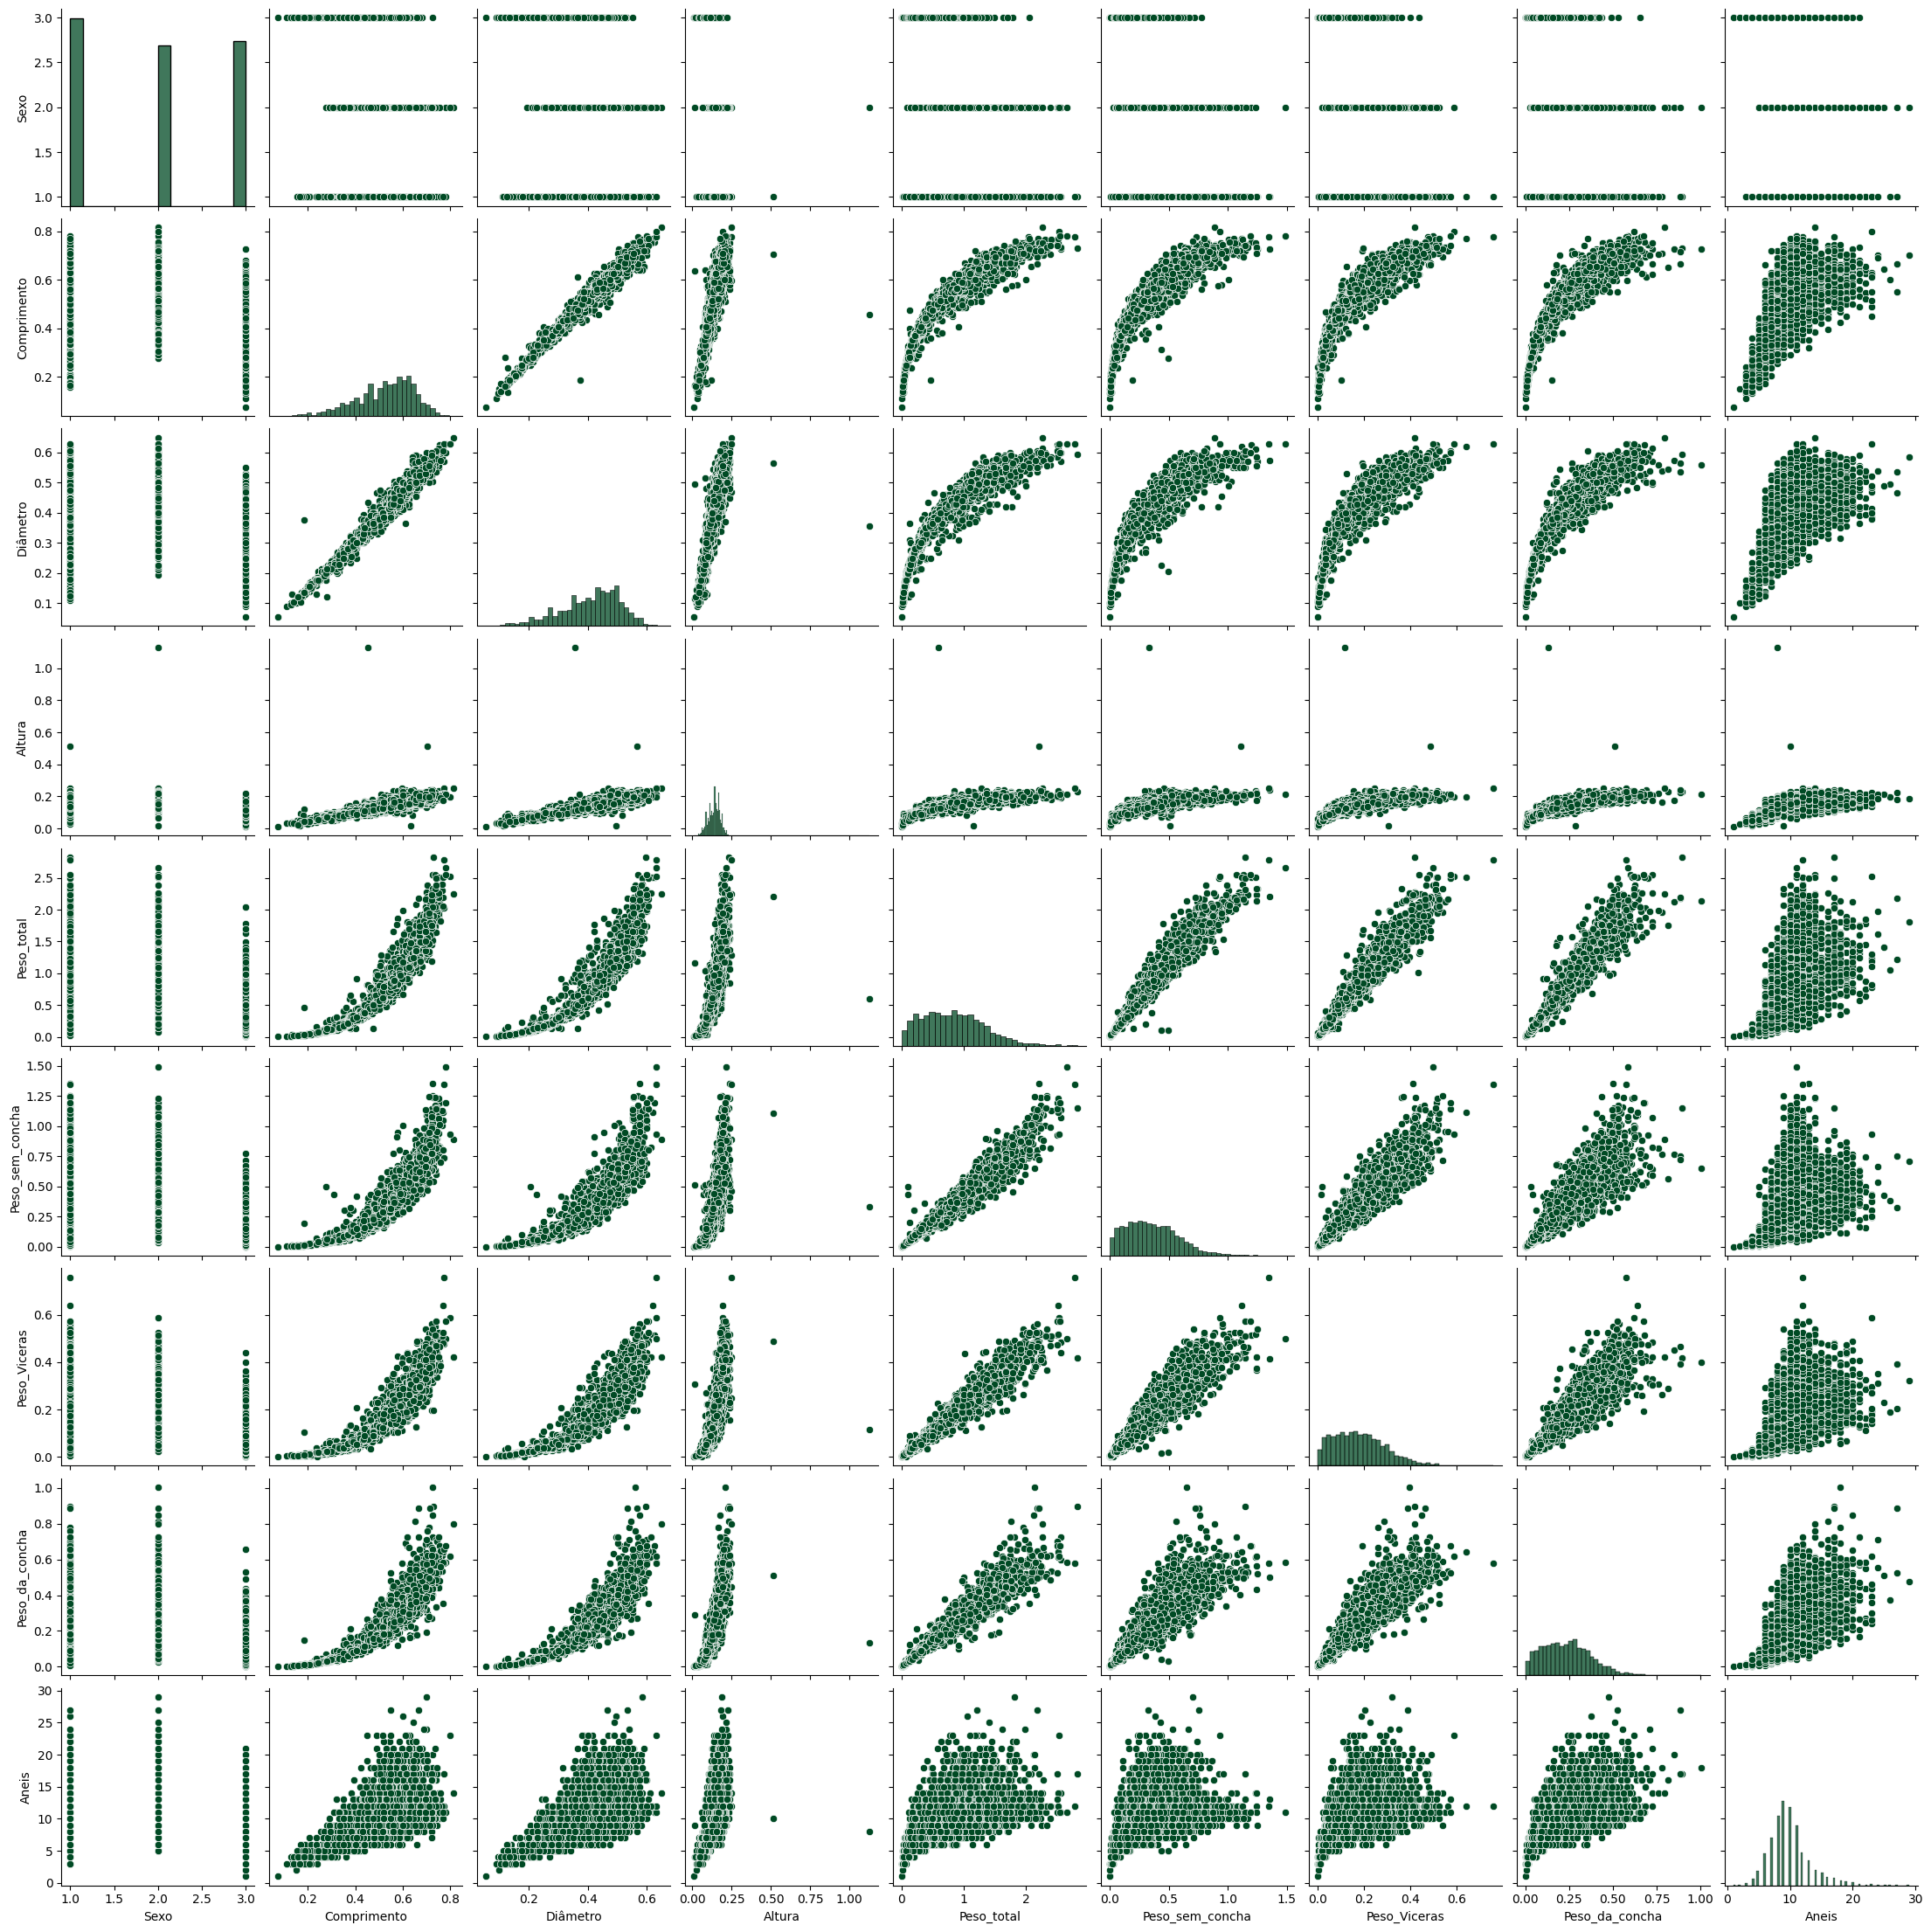

In [19]:
sns.set_palette("ocean")
sns.pairplot(df)
plt.show()

#### Escolhas para análise Preditiva
_______________
- variável resposta (Y): Anéis
- variáveis explicativas (X) de (Y):  Peso da Concha , Peso sem Concha e Altura.

#### Remover colunas que não serão usadas

In [20]:
df = df.drop(columns = ['Sexo','Comprimento','Diâmetro','Peso_total','Peso_Viceras'], axis=1)

In [21]:
df.head(5)

,Altura,Peso_sem_concha,Peso_da_concha,Aneis
0,0.095,0.2245,0.150,15
1,0.090,0.0995,0.070,7
2,0.135,0.2565,0.210,9
3,0.125,0.2155,0.155,10
4,0.080,0.0895,0.055,7


#### Separando e guardando minha variável resposta: 'Aneis'

In [22]:
#Variável resposta será o  y:
Y = df["Aneis"].copy()

#Conjunto de variáveis explicativas (1 ou mais variáveis) será o x:
X = df.drop("Aneis", axis=1).copy()

X

,Altura,Peso_sem_concha,Peso_da_concha
0,0.095,0.2245,0.1500
1,0.090,0.0995,0.0700
2,0.135,0.2565,0.2100
3,0.125,0.2155,0.1550
4,0.080,0.0895,0.0550
...,...,...,...
4172,0.165,0.3700,0.2490
4173,0.135,0.4390,0.2605
4174,0.205,0.5255,0.3080
4175,0.150,0.5310,0.2960


In [23]:
lista_maelm = []
lista_maeDt = []
lista_maeRF = []
lista_maePo = []

for i in range(100):
    # Dividir os dados
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)

    # Treinar o modelo
    modelolm = LinearRegression()
    modelolm.fit(X_train, Y_train)
    predicoeslm = modelolm.predict(X_test)

    # Treinar o modelo
    modeloDT = DecisionTreeRegressor()
    modeloDT.fit(X_train, Y_train)
    predicoesDT = modeloDT.predict(X_test)

    # Treinar o modelo
    modeloRF = RandomForestRegressor()
    modeloRF.fit(X_train, Y_train)
    predicoesRF = modeloRF.predict(X_test)

    # Treinar o modelo
    modeloPoisson = PoissonRegressor()
    modeloPoisson.fit(X_train, Y_train)
    predicoesPoisson = modeloPoisson.predict(X_test)

    # Avaliação dos Erros do Modelo
    maelm = mean_absolute_error(Y_test, predicoeslm)
    maeDT = mean_absolute_error(Y_test, predicoesDT)
    maeRF = mean_absolute_error(Y_test, predicoesRF)
    maePo = mean_absolute_error(Y_test, predicoesPoisson)

    lista_maelm.append(maelm)
    lista_maeDt.append(maeDT)
    lista_maeRF.append(maeRF)
    lista_maePo.append(maePo)

### Regressão liear

##### Média da lista: Regressão linear

In [24]:
  np.mean(lista_maelm)

1.6687211151891606

##### Desvio padrão: Regressão linear

In [25]:
  np.std(lista_maelm)

0.04803738095736709

##### Variância : Regresão linear

In [26]:
np.var(lista_maelm)

0.002307589969243215

## Árvore de Decisão

###### Média da lista: Árvore de Decisao

In [27]:
  np.mean(lista_maeDt)

2.1420419161676647

###### Desvio padrão: Árvore de Decisao

In [28]:
 np.std(lista_maeDt)

0.07395242527018178

##### Variância: Árvore de Decisao

In [29]:
np.var(lista_maeDt)

0.005468961203341821

## Árvore Randomica

###### Média da lista: Árvore Randomica

In [30]:
  np.mean(lista_maeRF)

1.6495851956087824

###### Desvio padrão: Árvore Randomica

In [31]:
 np.std(lista_maeRF)

0.04568596772482971

##### Variância: Árvore de Decisao

In [32]:
np.var(lista_maeRF)

0.002087207646954182

## Modelo de Poisson

###### Média da lista: Modelo de Poisson

In [33]:
  np.mean(lista_maePo)

2.1343068643760152

###### Desvio da lista: Modelo de Poisson

In [34]:
 np.std(lista_maePo)

0.05981472396389902

###### Variância da lista: Modelo de Poisson

In [35]:
np.var(lista_maePo)

0.0035778012028774364

✅ O modelo que menos apresenta erro é o de árvore randomica. Com valore menores em média, desvio padrão e variância  

#### Criação dos novos dados que serão testados

In [36]:
Altura = float(input('Qual a altura do abalone em mm? '))
Peso_sem_concha = float(input('Qual o peso do abalone sem a concha em g? '))
Peso_da_concha = float(input('Qual o peso da concha do abalone seca e vazia em g? '))

Qual a altura do abalone em mm? 0.23
Qual o peso do abalone sem a concha em g? 0.09
Qual o peso da concha do abalone seca e vazia em g? 0.15


In [37]:
idade = {
    'Altura': [Altura],
    'Peso_sem_concha': [Peso_sem_concha],
    'Peso_da_concha': [Peso_da_concha]
}

aneis_idade = pd.DataFrame(idade)

aneis_idade

,Altura,Peso_sem_concha,Peso_da_concha
0,0.23,0.09,0.15


In [38]:
previsao_de_aneislm = modelolm.predict(aneis_idade)
previsao_de_aneisDT = modeloDT.predict(aneis_idade)
previsao_de_aneisRF = modeloRF.predict(aneis_idade)
previsao_de_aneisPo = modeloPoisson.predict(aneis_idade)

print('A quantidade de aneis esperadas é:',previsao_de_aneislm[0].round(2))
print('A quantidade de aneis esperadas é:',previsao_de_aneisDT[0].round(2))
print('A quantidade de aneis esperadas é:',previsao_de_aneisRF[0].round(2))
print('A quantidade de aneis esperadas é:',previsao_de_aneisPo[0].round(2))

A quantidade de aneis esperadas é: 11.82
A quantidade de aneis esperadas é: 19.0
A quantidade de aneis esperadas é: 13.27
A quantidade de aneis esperadas é: 9.33
